<img src="https://github.com/FarzadNekouee/Facial_Analysis_with_Mask_Detection/blob/master/cover_images/cover_image_titled.jpg?raw=true" width="2400">

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#004D4C;"><b>📄 Description</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">In this project, "Facial Attribute Analysis", we utilize advanced AI for detailed identification of age, gender, race, and emotions such as anger, fear, happiness, and surprise, catering to a range of ethnicities including Asian, White, Middle Eastern, Indian, Latino, and Black. Our system is uniquely designed to recognize masked faces, marking them accordingly. When a face is not masked, our algorithm employs the DeepFace library to perform an in-depth facial attribute analysis, ensuring accurate and nuanced insights into each unobscured face.</p>
</div>

<div style="background-color:#c8dbda; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
<h1 style="font-size:24px; font-family:calibri; color:#004D4C;"><b>🎯 Objectives</b></h1>

1️⃣. **Mask Detection Model Development:** 
   Developing a model to identify if faces in images are masked, using our dataset and InceptionV3's transfer learning capabilities for enhanced accuracy.

    
2️⃣. **Facial Analysis with Mask Detection Integration:** 
   Combining mask detection with DeepFace-driven facial analysis to accurately annotate unmasked faces with attributes such as age, gender, race, and emotion.


<a id="contents_tabel"></a>   

<div style="background-color:#c8dbda; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#004D4C;"><b>📋 Table of Contents</b></h1>

* [Step 1 | Setup and Initialization](#Initialization)
* [Step 2 | Mask Detection Model Development](#mask_detection)
    - [Step 2.1 | Dataset Analysis](#dataset_analysis)
    - [Step 2.2 | Centralizing Dataset Information](#dataset_centralizing)
    - [Step 2.3 | Data Splitting into Training & Validation Sets](#dataset_spliting)
    - [Step 2.4 | Data Augmentation & Preprocessing](#data_augmentation)
    - [Step 2.5 | Model Architecture Development](#model_architecture)
    - [Step 2.6 | Model Training leveraging pre-trained weights](#model_training)
    - [Step 2.7 | Model Performance Assessment](#model_assesment)
* [Step 3 | Facial Analysis with Mask Detection Integration](#facial_analysis)

<a id="Initialization"></a>
# <p style="background-color: #006766; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Setup and Initialization</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">First, let's import all the essential libraries needed for our project:</p>
</div>

In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import pandas as pd
import random
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input as inceptionv3_preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from deepface import DeepFace

In [2]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#f0f2f2'}, style='darkgrid')

<a id="mask_detection"></a>
# <p style="background-color: #006766; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;"> Step 2 | Mask Detection Model Development</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#004D4C;"><b>🎭 Mask Detection Model Development</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">In this step of our project, I focus on creating a model specifically for detecting whether a face in an image is wearing a mask. This is crucial because our Facial Attribute Analysis models, which predict age, gender, race, and emotion, may not perform accurately when a face is masked. To address this, we need to train a dedicated mask detection model. Since there aren't readily available pre-trained models for this specific task, I'll be training our own. For this, I've selected a dataset that provides a substantial collection of images labeled as 'with mask' or 'without mask'. I've chosen the dataset available at <a href="https://www.kaggle.com/datasets/farnazmirfeizi/mask-detection" target="_blank">this Kaggle link</a> for its variety and relevance.</p>
</div>


<a id="dataset_analysis"></a>
# <b><span style='color:#5ec4c3'>Step 2.1 |</span><span style='color:#006766'> Dataset Analysis</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Firstly, I'll begin by conducting an initial analysis to explore the class distribution within the dataset:</p>
</div>

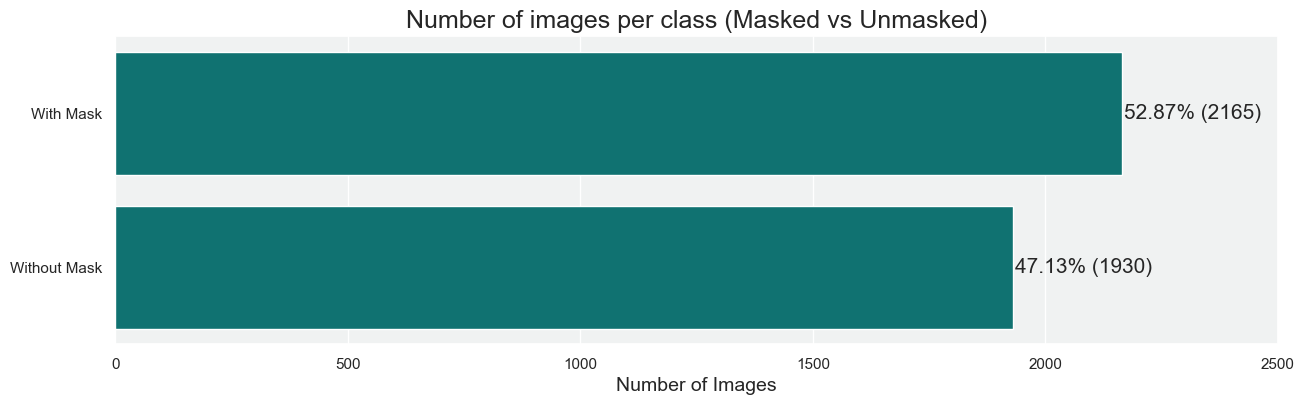

In [3]:
# Specify the path to the zip file
zip_path = './dataset.zip'  

# Specify the directory where we want to extract the contents of the zip file
extract_path = './'  

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    
# After extracting, specify the directories of the actual images
with_mask_path = os.path.join(extract_path, 'dataset/with_mask')
without_mask_path = os.path.join(extract_path, 'dataset/without_mask')

# List all filenames in the 'with_mask' and 'without_mask' directories
with_mask_images = os.listdir(with_mask_path)
without_mask_images = os.listdir(without_mask_path)

# Get the count of each class
with_mask_count = len(with_mask_images)
without_mask_count = len(without_mask_images)

# Calculate the percentages
total_images = with_mask_count + without_mask_count
with_mask_percentage = (with_mask_count / total_images) * 100
without_mask_percentage = (without_mask_count / total_images) * 100

# Plotting
labels = ['With Mask', 'Without Mask']
counts = [with_mask_count, without_mask_count]
percentages = [with_mask_percentage, without_mask_percentage]

# Set the figure size
plt.figure(figsize=(15, 4))

# Create a horizontal bar plot
ax = sns.barplot(y=labels, x=counts, orient='h', color='#008281')

# Set x-axis interval
ax.set_xticks(range(0, max(counts) + 500, 500))  

# Annotate each bar with the count and percentage
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2., 
            '{:1.2f}% ({})'.format(percentages[i], counts[i]),
            va="center", fontsize=15)
    
# Set the x-label for the plot
plt.xlabel('Number of Images', fontsize=14)

# Set the title and show the plot
plt.title("Number of images per class (Masked vs Unmasked)", fontsize=18)
plt.show()

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#004D4C;"><b>📊 Class Distribution Analysis</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">The provided plot illustrates an almost equal distribution between the two classes, with 53% of images showing faces with masks and 47% without. This balance mitigates concerns about class imbalance that could adversely affect model training. Consequently, we can confidently use accuracy as a metric to evaluate our model's performance.</p>
</div>

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Next, I'll delve into the dataset to analyze the distribution of image dimensions:</p>
</div>

In [4]:
# Lists to store heights and widths of all images
heights = []
widths = []

# Initialize a set to store unique dimensions and channels
unique_dims = set()
unique_channels = set()

# Function to process images in a directory
def process_images(image_path):
    filenames = os.listdir(image_path)
    for filename in filenames:
        img = cv2.imread(os.path.join(image_path, filename))
        if img is not None:
            # Add the dimensions (height, width, channels) to the set
            unique_dims.add((img.shape[0], img.shape[1]))
            
            # Add the channels to the set
            unique_channels.add(img.shape[2])
            
            # Append heights and widths for statistical calculations
            heights.append(img.shape[0])
            widths.append(img.shape[1])

# Process images in both 'with_mask' and 'without_mask' directories
process_images(with_mask_path)
process_images(without_mask_path)

# Check if all images have the same dimension
if len(unique_dims) == 1:
    print(f"All images have the same dimensions: {list(unique_dims)[0]}")
else:
    print(f"There are {len(unique_dims)} different image dimensions in the dataset.")
    print(f"Min height: {min(heights)}, Max height: {max(heights)}, Mean height: {np.mean(heights):.2f}")
    print(f"Min width: {min(widths)}, Max width: {max(widths)}, Mean width: {np.mean(widths):.2f}")

# Check if all images have the same number of channels
if len(unique_channels) == 1:
    channel = list(unique_channels)[0]
    if channel == 3:
        print("All images are color images.")
    else:
        print("All images have the same number of channels, but they are not color images.")
else:
    print("Images have different numbers of channels.")

There are 2589 different image dimensions in the dataset.
Min height: 27, Max height: 5412, Mean height: 287.75
Min width: 26, Max width: 5760, Mean width: 285.54
All images are color images.


<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#004D4C;"><b>📏 Image Dimension Analysis</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">The dataset showcases a wide array of image sizes, with dimensions ranging broadly in height and width. Despite the diversity in size, all images are consistently in color. To maintain uniformity and ensure our model's optimal performance, resizing will be a necessary step in preprocessing.</p>
</div>

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Lastly for this step, I'll visually explore a selection of images showcasing both masked and unmasked faces:</p>
</div>

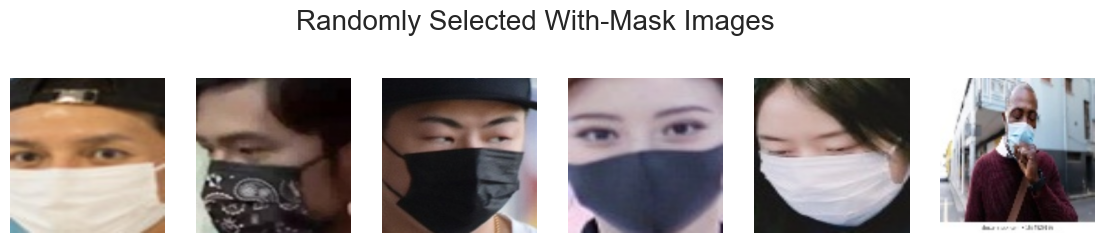

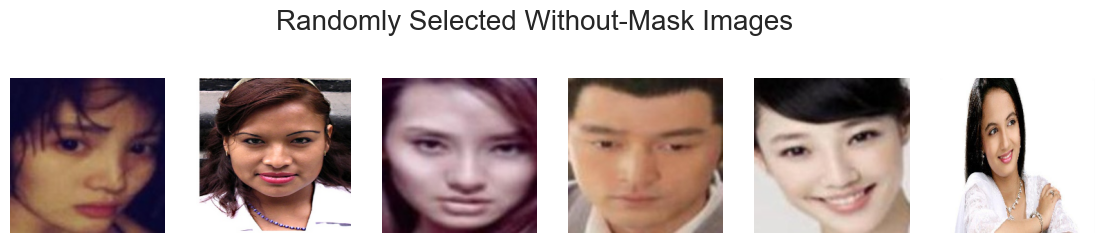

In [5]:
# Function to plot images
def plot_images(images, title, path):
    plt.figure(figsize=(14, 3))
    for i, img_name in enumerate(images):
        plt.subplot(1, 6, i + 1)
        img = cv2.imread(os.path.join(path, img_name))
        # Resize the image to a fixed size (e.g., 224x224)
        img = cv2.resize(img, (224, 224))
        # Convert the BGR image (default in OpenCV) to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title, fontsize=20)
    plt.show()

# Randomly select 6 images from each category
random_with_mask_images = random.sample(with_mask_images, 6)
random_without_mask_images = random.sample(without_mask_images, 6)

# Plot the images
plot_images(random_with_mask_images, "Randomly Selected With-Mask Images", with_mask_path)
plot_images(random_without_mask_images, "Randomly Selected Without-Mask Images", without_mask_path)

<a id="dataset_centralizing"></a>
# <b><span style='color:#5ec4c3'>Step 2.2 |</span><span style='color:#006766'> Centralizing Dataset Information</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">In this step, I'll consolidate our dataset's details into a DataFrame, streamlining data management and processing for the next stages:</p>
</div>

In [6]:
# Initialize an empty list to store image file paths and their respective labels
data = []

# Append the 'with_mask' image file paths with label "with_mask" to the data list
data.extend([(os.path.join(with_mask_path, filename), "with_mask") for filename in os.listdir(with_mask_path)])

# Append the 'without_mask' image file paths with label "without_mask" to the data list
data.extend([(os.path.join(without_mask_path, filename), "without_mask") for filename in os.listdir(without_mask_path)])

# Convert the collected data into a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame
df.head()

filepath      label
0  ./dataset/with_mask\0129.png  with_mask
1  ./dataset/with_mask\0323.jpg  with_mask
2  ./dataset/with_mask\0417.jpg  with_mask
3  ./dataset/with_mask\0502.png  with_mask
4  ./dataset/with_mask\0803.jpg  with_mask

In [7]:
print("Total number of images in the dataset:", len(df))

Total number of images in the dataset: 4095


In [8]:
# Deleting unnecessary variables to free up memory
del heights, widths, unique_dims, unique_channels, data, with_mask_images, without_mask_images

<a id="dataset_spliting"></a>
# <b><span style='color:#5ec4c3'>Step 2.3 |</span><span style='color:#006766'> Data Splitting into Training & Validation Sets</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Then, I am going to split our dataset into train and validation sets, ensuring a balanced class distribution with stratification and mixing the images for randomness using shuffling:</p>
</div>

In [9]:
# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Display the shape of the training and validation sets
print("Training data shape:", train_df.shape)
print("Validation data shape:", val_df.shape)

# Deleting the original DataFrame to free up memory
del df

Training data shape: (3276, 2)
Validation data shape: (819, 2)


In [10]:
# Display the first few rows of the train DataFrame
train_df.head()

filepath         label
1982               ./dataset/with_mask\with_mask506.jpg     with_mask
2333      ./dataset/without_mask\0_0_gulinazha_0149.jpg  without_mask
3300         ./dataset/without_mask\1_0_hanxue_0222.jpg  without_mask
1538               ./dataset/with_mask\with_mask062.jpg     with_mask
581   ./dataset/with_mask\0_0_66f2c159jw1e8jurshmssj...     with_mask

<a id="data_augmentation"></a>
# <b><span style='color:#5ec4c3'>Step 2.4 |</span><span style='color:#006766'> Data Augmentation & Preprocessing</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">In this step, I'll be enhancing our model's robustness and preventing overfitting by introducing real-time image augmentations during training. I'll employ a <strong>ImageDataGenerator</strong> from Keras, which efficiently applies transformations like rotations and shifts on-the-fly, directly from our dataset. This memory-efficient method doesn't require storing augmented images and ensures our model is trained on a diverse set of data. Our function <strong>create_data_generators</strong> will manage these augmentations and adapt image preprocessing to align with the specific needs of our InceptionV3 model. By using <strong>flow_from_dataframe</strong>, it will seamlessly integrate these augmentations with our DataFrame, which houses the image paths and labels. This setup prepares our model for real-world application by simulating a variety of scenarios, all while maintaining the integrity of the images as dictated by the InceptionV3 preprocessing standards:</p>
</div>

In [11]:
def create_data_generators(train_df, val_df, filepath_column='filepath', label_column='label', 
                           preprocessing_function=None, batch_size=32, image_dimensions=(299, 299)):
    """
    Creates and returns training and validation data generators with optional preprocessing.
    
    Parameters:
    - train_df (DataFrame): DataFrame containing training data.
    - val_df (DataFrame): DataFrame containing validation data.
    - filepath_column (str, optional): Name of the column in DataFrame containing file paths. Defaults to 'filepath'.
    - label_column (str, optional): Name of the column in DataFrame containing labels. Defaults to 'label'.
    - preprocessing_function (function, optional): Preprocessing function specific to a model. Defaults to None.
    - batch_size (int, optional): Number of images per batch for the generators. Defaults to 32.
    - image_dimensions (tuple, optional): Dimensions to which the images will be resized (height, width). Defaults to (299, 299).
    
    Returns:
    - train_generator (ImageDataGenerator): Generator for training data with augmentations.
    - val_generator (ImageDataGenerator): Generator for validation data without augmentations.
    
    Notes:
    - The training generator uses augmentations.
    - The validation generator does not use any augmentations.
    - If provided, the preprocessing function is applied to both generators.
    """

    # Define our training data generator with specific augmentations
    train_datagen = ImageDataGenerator(
        rotation_range=15,                             # Randomly rotate the images by up to 15 degrees
        width_shift_range=0.15,                        # Randomly shift images horizontally by up to 15% of the width
        height_shift_range=0.15,                       # Randomly shift images vertically by up to 15% of the height
        zoom_range=0.15,                               # Randomly zoom in or out by up to 15%
        horizontal_flip=True,                          # Randomly flip images horizontally
        vertical_flip=False,                           # Do not flip images vertically as it doesn't make sense in our context
        shear_range=0.02,                              # Apply slight shear transformations
        preprocessing_function=preprocessing_function  # Apply preprocessing function if provided
    )

    # Define our validation data generator without any augmentations but with the preprocessing function if provided
    val_datagen = ImageDataGenerator(
        preprocessing_function=preprocessing_function
    )

    # Create an iterable generator for training data
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,                 # DataFrame containing training data
        x_col=filepath_column,              # Column with paths to image files
        y_col=label_column,                 # Column with image labels
        target_size=image_dimensions,       # Resize all images to size of 224x224 
        batch_size=batch_size,              # Number of images per batch
        class_mode='binary',                # Specify binary classification task
        seed=42,                            # Seed for random number generator to ensure reproducibility
        shuffle=True                        # Shuffle the data to ensure the model gets a randomized batch during training
    )

    # Create an iterable generator for validation data
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col=filepath_column,
        y_col=label_column,
        target_size=image_dimensions,
        batch_size=batch_size,
        class_mode='binary',
        seed=42,
        shuffle=False
    )
    
    # Return the training and validation generators
    return train_generator, val_generator

<a id="model_architecture"></a>
# <b><span style='color:#5ec4c3'>Step 2.5 |</span><span style='color:#006766'> Model Architecture Development</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#004D4C;"><b>🏗️ Model Architecture Setup</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">In this step, I will build a model to detect whether a face in an image is wearing a mask. I will be using the <strong>InceptionV3</strong> model, renowned for its effectiveness, pre-trained on the vast ImageNet dataset. Leveraging transfer learning, I'll utilize InceptionV3's already learned features as a starting point. I'll customize InceptionV3 for our binary classification task by removing its original classifier, designed for 1,000 ImageNet categories, and adding a binary classifier suitable for distinguishing between masked and unmasked faces. <strong>All layers of InceptionV3 will remain unfrozen</strong>, allowing the entire model to update during training. This approach is chosen because our dataset, focusing specifically on mask detection, is quite different from the generic images of ImageNet, and we have ample data to fine-tune the model effectively without overfitting.</p>
</div>

In [12]:
# Load the InceptionV3 model pre-trained on ImageNet data, excluding the top classifier
inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [13]:
# Following the same pattern to add new layers to InceptionV3 base
x = inceptionv3_base.output
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)  
x = Dropout(0.5)(x)  
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
inceptionv3_model = Model(inputs=inceptionv3_base.input, outputs=predictions)

# Compile the model after setting layers to non-trainable
inceptionv3_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# MobileNetV2 model summary
inceptionv3_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Now, let's visualize the architecture of our final InceptionV3 model:</p>
</div>

In [14]:
plot_model(inceptionv3_model, show_shapes=True, show_layer_names=False, dpi=100)

<a id="model_training"></a>
# <b><span style='color:#5ec4c3'>Step 2.6 |</span><span style='color:#006766'> Model Training leveraging pre-trained weights</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Following the setup, I'll utilize the <strong>create_data_generators</strong> function to craft our data generators, essential for fine-tuning the InceptionV3 model with our specific dataset. The model will undergo training for just 5 epochs, capitalizing on the pre-trained weights to ensure efficient and effective learning:</p>
</div>

In [15]:
# Define number of epochs
num_epochs = 6

# Create data generators
train_generator, val_generator = create_data_generators(train_df, 
                                                        val_df, 
                                                        preprocessing_function=inceptionv3_preprocess_input, 
                                                        batch_size=32, 
                                                        image_dimensions=(299, 299))

# Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True, verbose=1)

# Train the model
history = inceptionv3_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[reduce_lr, early_stopping]
)

Found 3273 validated image filenames belonging to 2 classes.
Found 819 validated image filenames belonging to 2 classes.
Epoch 1/6
103/103 [==============================] - 719s 7s/step - loss: 0.0836 - accuracy: 0.9646 - val_loss: 0.0082 - val_accuracy: 0.9988 - lr: 1.0000e-04
Epoch 2/6
103/103 [==============================] - 728s 7s/step - loss: 0.0203 - accuracy: 0.9942 - val_loss: 0.0385 - val_accuracy: 0.9866 - lr: 1.0000e-04
Epoch 3/6
103/103 [==============================] - 739s 7s/step - loss: 0.0157 - accuracy: 0.9945 - val_loss: 0.0115 - val_accuracy: 0.9939 - lr: 1.0000e-04
Epoch 4/6
103/103 [==============================] - 690s 7s/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0018 - val_accuracy: 1.0000 - lr: 5.0000e-05
Epoch 5/6
103/103 [==============================] - 689s 7s/step - loss: 0.0034 - accuracy: 0.9985 - val_loss: 0.0057 - val_accuracy: 0.9976 - lr: 5.0000e-05
Epoch 6/6
103/103 [==============================] - 685s 7s/step - loss: 0.0029 - a

<a id="model_assesment"></a>
# <b><span style='color:#5ec4c3'>Step 2.7 |</span><span style='color:#006766'> Model Performance Assessment</span></b>
⬆️ [Tabel of Contents](#contents_tabel) 

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">I'll finally assess our mask detection model's effectiveness by examining its learning curves and accuracy on the validation set. This evaluation will provide insights into the model's overall reliability and predictive capabilities:</p>
</div>

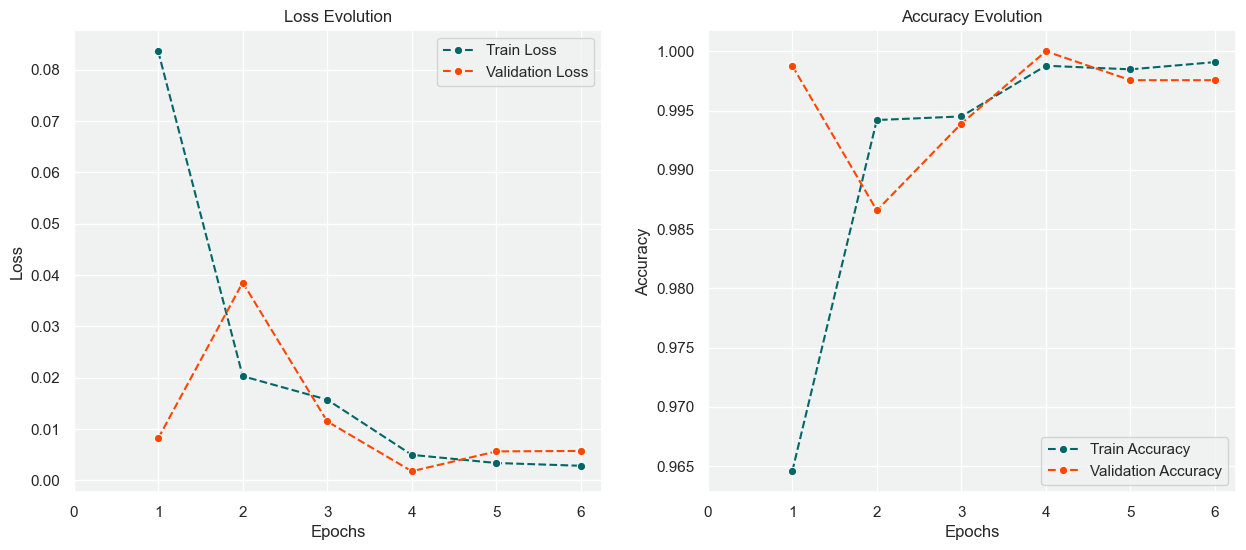

In [16]:
# Convert the history.history dict to a pandas DataFrame for easy plotting
hist = pd.DataFrame(history.history)

# Plotting the learning curves
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
sns.lineplot(x=hist.index+1, y=hist['loss'], color='#006766', label='Train Loss', marker='o', linestyle='--')
sns.lineplot(x=hist.index+1, y=hist['val_loss'], color='orangered', label='Validation Loss', marker='o', linestyle='--')
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0,num_epochs+1))

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
sns.lineplot(x=hist.index+1, y=hist['accuracy'], color='#006766', label='Train Accuracy', marker='o', linestyle='--')
sns.lineplot(x=hist.index+1, y=hist['val_accuracy'], color='orangered', label='Validation Accuracy', marker='o', linestyle='--')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0,num_epochs+1))

plt.show()

In [17]:
# Evaluates the model on the validation set
results = inceptionv3_model.evaluate(val_generator, steps=len(val_generator))

# The 'results' list contains loss as the first element and accuracy as the second
accuracy = results[1]

# Print the model accuracy on validation set
print(f'Validation Accuracy: %{round(100*accuracy,2)}')

26/26 [==============================] - 27s 1s/step - loss: 0.0057 - accuracy: 0.9976
Validation Accuracy: %99.76


<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#004D4C;"><b>🧠 Insights from Model Training</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">The learning curves suggest that the model is performing exceptionally well on both the training and validation datasets, with accuracy approaching 100%. The validation loss is low and stable, indicating that the model generalizes well to unseen data. Overall, the model seems to have learned the task effectively, but it would be prudent to test it further on an independent test set to confirm these results.</p>
</div>

<a id="facial_analysis"></a>
# <p style="background-color: #006766; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;"> Step 3 | Facial Analysis with Mask Detection Integration</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">I am going to define a function to process any given face image and predict whether it's covered by a mask using the earlier model we fine-tuned. This streamlined approach ensures each image is prepped and assessed efficiently in one step:</p>
</div>

In [18]:
def analyze_mask_in_image(image, model):
    """
    Processes an image and predicts the likelihood of a face mask being present using the provided model.

    Parameters:
    - image (numpy array): The image containing the face to analyze.
    - model (tensorflow.keras.models.Model): The pre-trained model for mask detection.

    Returns:
    - prediction (float): The predicted probability that the image contains a 'without_mask' face.
    """
    # Resize the image to the expected input size of the model (299, 299)
    resized_img = cv2.resize(image, (299, 299))
    
    # Convert the image from BGR to RGB and normalize
    processed_img = inceptionv3_preprocess_input(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))

    # Add an extra dimension to match the model's input shape and perform prediction
    prediction = model.predict(np.expand_dims(processed_img, axis=0))
    
    return prediction[0][0]

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Afterward, I am going to define the <strong>annotate_image_with_attributes</strong> function to streamline the process of facial analysis in our images. This function will detect each face within an image, apply our mask detection model to determine if the face is covered, and if not, use DeepFace to annotate the face with attributes such as age, gender, race, and emotion. This step is vital to ensure that our subsequent analysis is performed only on faces without masks for accurate attribute assessment:</p>
</div>

In [19]:
def annotate_image_with_attributes(image, model, detector_backend='retinaface'):
    """
    Receives an image, detects faces, and annotates it with attributes or mask presence.

    Parameters:
    - image (numpy array): The image to annotate.
    - model (tensorflow.keras.models.Model): The pre-trained mask detection model.
    - backends (list): List of face detection backends supported by DeepFace.

    Returns:
    - image_rgb (numpy array): The annotated image in RGB format.
    """
    # Face analysis using DeepFace
    analysis = DeepFace.analyze(img_path=image, actions=['emotion', 'age', 'gender', 'race'], detector_backend=detector_backend)

    # Iterate over each detected face
    for face in analysis:
        x, y, w, h = face['region']['x'], face['region']['y'], face['region']['w'], face['region']['h']
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Crop the face from the image
        face_img = image[y:y+h, x:x+w]
        
        # Predict mask presence using the provided model
        mask_presence = analyze_mask_in_image(face_img, model)

        # Annotate based on mask presence
        if mask_presence < 0.5:  # Threshold might need adjustment
            text_line1 = "Masked"
        else:
            # Annotate with age, gender, race, and emotion if no mask is detected
            text_line1 = f"{face['dominant_race'].capitalize()}, {face['dominant_gender']}, Age: {face['age']}"
            text_line2 = f"Emotion: {face['dominant_emotion']}"
            cv2.putText(image, text_line2, (x, y + h + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)

        # Add the first line of text
        cv2.putText(image, text_line1, (x, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
    return image

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">In order to utilize the <strong>annotate_image_with_attributes</strong> function effectively, we need to select a suitable face detector backend. DeepFace offers several backends, each with its own strengths tailored to different use-case scenarios, as outlined below:</p>
</div>

In [20]:
# List of available face detection backends in DeepFace.
# Each backend offers different strengths depending on the use-case scenario.
backends = [
  'opencv',     # OpenCV's Haar Cascade, good for basic face detection, fast but less accurate.
  'ssd',        # Single Shot MultiBox Detector, a balance of speed and accuracy.
  'dlib',       # Dlib’s HOG based model, accurate but can be slow without a GPU.
  'mtcnn',      # Multi-task Cascaded Convolutional Networks, very good at detecting small faces.
  'retinaface', # RetinaFace, state-of-the-art in terms of accuracy, requires more computational power.
  'mediapipe',  # MediaPipe, offers robust face detection, even in tough conditions.
  'yolov8',     # YOLOv8, an advancement in speed and accuracy, great for real-time processing.
  'yunet',      # YuNet, an ONNX-based fast and accurate detector.
  'fastmtcnn'  # Fast MTCNN, optimized version of MTCNN for real-time detection on CPUs.
]

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Finally, let's apply our complete algorithm to an input image using the defined function and observe the results:</p>
</div>

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.83it/s]


1/1 [==============================] - 0s 69ms/step


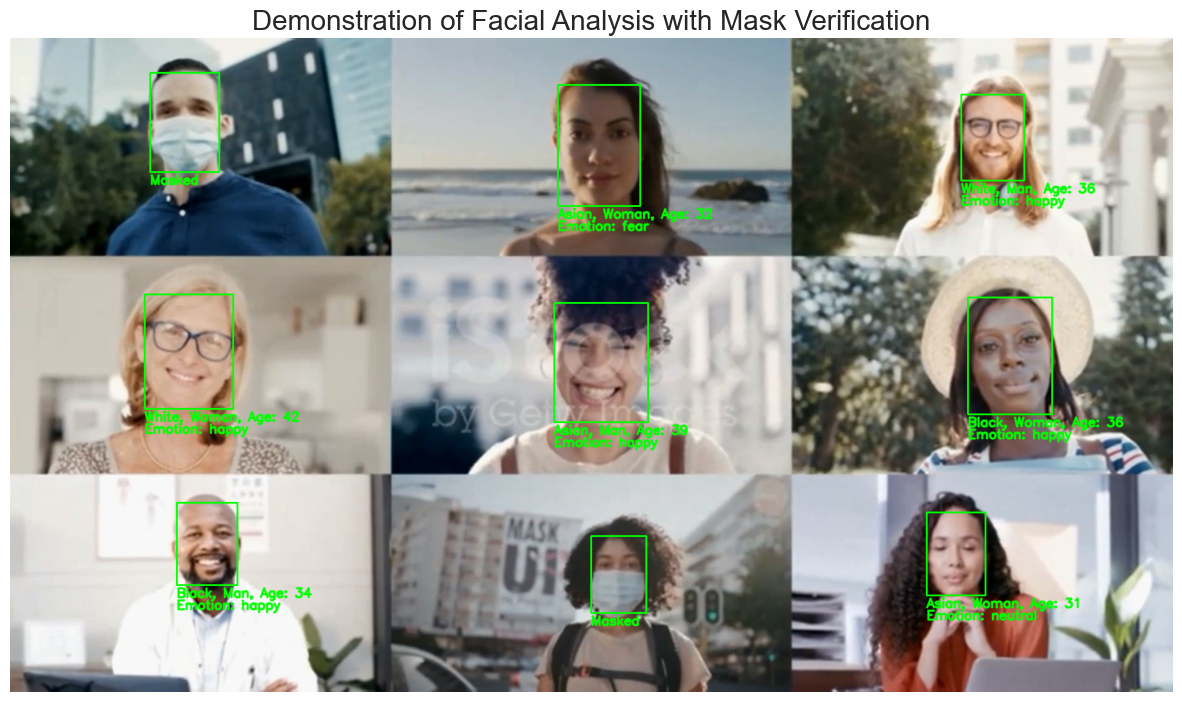

In [21]:
# Fetch the raw image from GitHub
url = "https://raw.githubusercontent.com/FarzadNekouee/Facial_Analysis_with_Mask_Detection/master/test_image/test_image.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# Call the function to get the annotated image
annotated_image = annotate_image_with_attributes(image, inceptionv3_model, backends[4])

# Convert the annotated image from BGR to RGB for display
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Use Matplotlib to display the annotated image
plt.figure(figsize=(15, 10))
plt.imshow(annotated_image)
plt.title("Demonstration of Facial Analysis with Mask Verification", fontsize=20)
plt.axis('off')
plt.show()

<div style="background-color:#c8dbda; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#004D4C;"><b>🏆 Comprehensive Facial Analysis Results</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Our facial analysis model excels in processing images by accurately detecting multiple faces, regardless of their number. Leveraging the InceptionV3 architecture, it discerns whether a person is masked, labeling such faces as 'Masked'. For unmasked faces, the model employs the DeepFace library to determine age, gender, and race, encompassing ethnicities like Asian, White, Middle Eastern, Indian, Latino, or Black. Additionally, it adeptly assesses emotional states, recognizing a range of expressions from happiness and fear to subtler ones like surprise or disgust. The model's effectiveness is evident in the sample output, where it precisely locates each face and annotates unmasked ones with clear, detailed attributes. This robust tool not only excels in facial recognition but also provides in-depth analysis, offering valuable insights into each individual in an image.</p>
</div>

<h2 align="left"><font color=#006766>Best Regards</font></h2>